Accuracy: 0.9999
F1 Score: 0.9999
ROC AUC: 1.0000


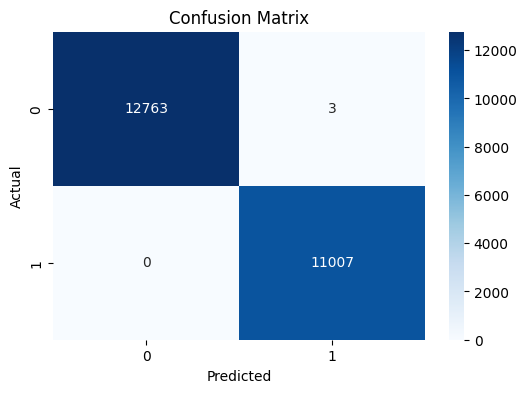

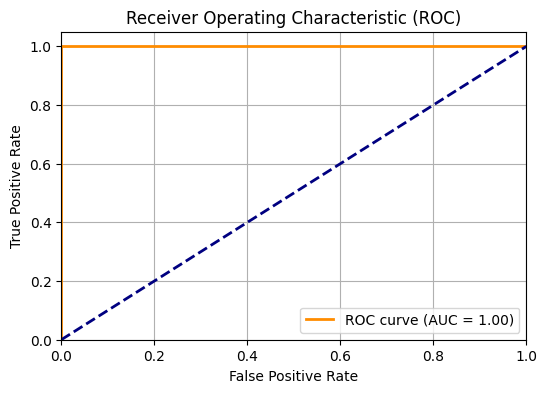

['faulty_inverter_model.pkl']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix,
    roc_curve, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


df = pd.read_excel("/content/Faulty_inverters_labeled_converted.xlsx")

X = df[['IRR_W_m2_', 'ACPowerInWatts', 'DCCurrentInAmps']]
y = df['Faulty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

joblib.dump(model, 'faulty_inverter_model.pkl')

In [ ]:
import joblib

model = joblib.load('faulty_inverter_model.pkl')

try:
    irr_value = float(input("Enter IRR_W_m2_ value: "))
    ac_power = float(input("Enter ACPowerInWatts value: "))
    dc_current = float(input("Enter DCCurrentInAmps value: "))

    prediction = model.predict([[irr_value, ac_power, dc_current]])
    print(f"\nPredicted Faulty: {int(prediction[0])}")
except ValueError:
    print("Invalid input! Please enter numeric values.")

Enter IRR_W_m2_ value: 10.5
Enter ACPowerInWatts value: 2000
Enter DCCurrentInAmps value: 4.5

Predicted Faulty: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
